# Load the Package/Library

In [2]:
import numpy as np
import pandas as pd
import statsmodels
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Load Data 

In [3]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

In [4]:
import numpy as np
import pandas as pd
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

# Fit the Regression Model

In [193]:
X = df[["RM", "LSTAT"]]
y = target["MEDV"]
X= sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
#print(model.summary())

# Checking the Assumptions 

## Linear Relationship 

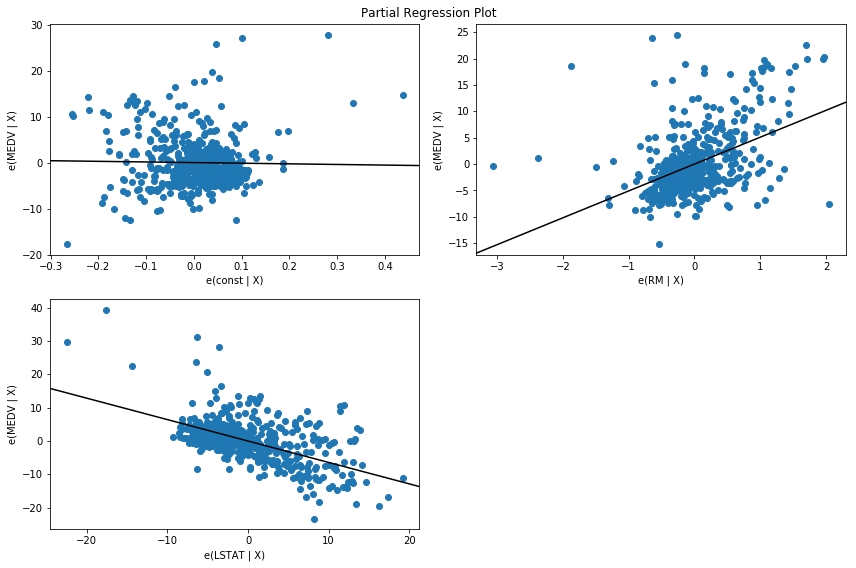

In [233]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

## Normality 

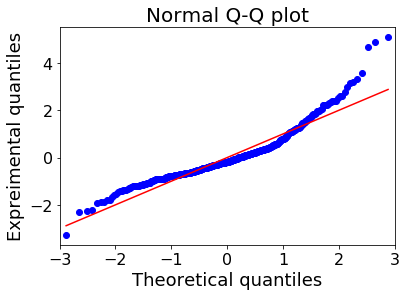

Kologorov-Smirnov Test Pvalue
2.489349018132833e-19


In [232]:
#Eksplorasi
import scipy.stats as stats
#fig=plt.figure(figsize=(12,8),facecolor='1.0') 
fig=sm.qqplot(resid,fit='True',line='s')
plt.title("Normal Q-Q plot", size=20)
plt.xlabel("Theoretical quantiles", size=18)
plt.ylabel("Expreimental quantiles", size=18)
plt.tick_params(labelsize=16)
plt.show()

#Uji Formal
ksstat, pvalue = statsmodels.stats.diagnostic.kstest_normal(resid)
print('Kologorov-Smirnov Test Pvalue')
print(pvalue)

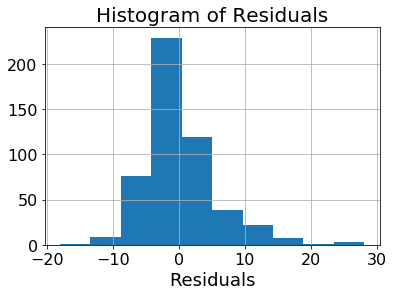

In [231]:
histogram=resid.hist()
plt.title("Histogram of Residuals", size=20)
plt.xlabel("Residuals", size=18)
plt.tick_params(labelsize=16)
plt.show()


## Homoscedasticity

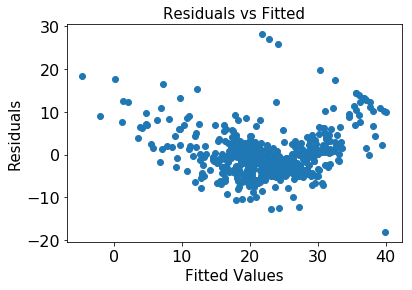

BP Test Pvalue
0.4669715488828765


In [230]:

model
resid=model.resid
plt.scatter(model.predict(),resid)
plt.title("Residuals vs Fitted", size=15)
plt.xlabel("Fitted Values", size=15)
plt.ylabel("Residuals", size=15)
plt.tick_params(labelsize=16)
plt.show()
lm,lm_pvalue,fvalue,f_pvalue=statsmodels.stats.diagnostic.het_breuschpagan(resid, X)
print('BP Test Pvalue')
print(f_pvalue)

Keterangan:

lm (float) – lagrange multiplier statistic

lm_pvalue (float) – p-value of lagrange multiplier test

fvalue (float) – f-statistic of the hypothesis that the error variance does not depend on x

f_pvalue (float) – p-value for the f-statistic

## Autocorrelation 

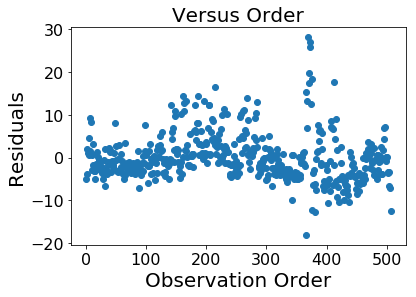

Durbin Watson P_Value
0.8342146070001701


In [229]:
a=np.arange(1,len(resid)+1,1)
plt.scatter(a,model.resid)
plt.title("Versus Order", size=20)
plt.xlabel("Observation Order", size=20)
plt.ylabel("Residuals", size=20)
plt.tick_params(labelsize=16)
plt.show()
dw=sm.stats.stattools.durbin_watson(model.resid)
print('Durbin Watson P_Value')
print(dw)

## Residuals Plots 

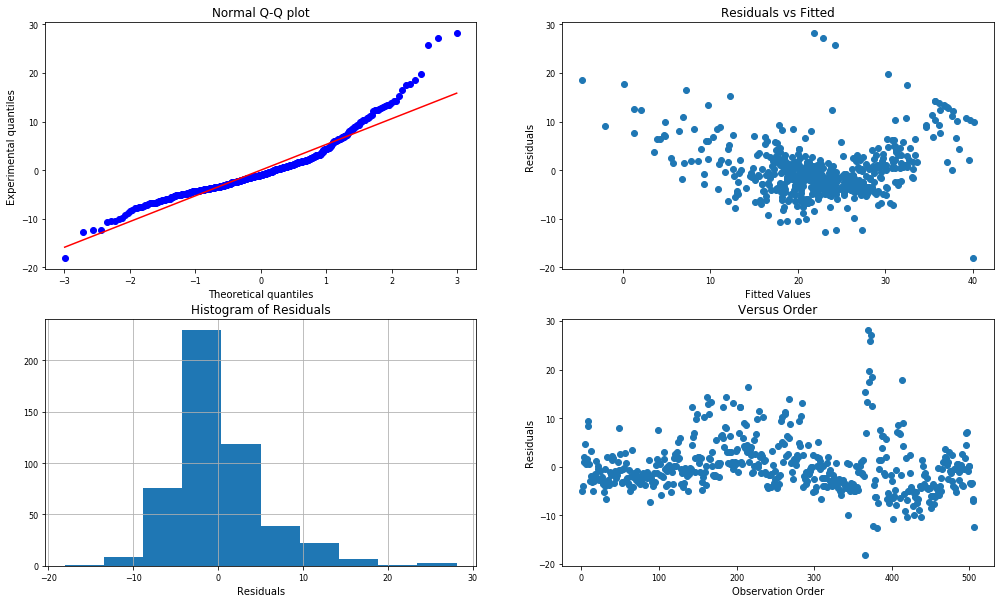

In [228]:
f=plt.figure(figsize=(17,10))
# QQNORM
f.add_subplot(2,2,1)
res = stats.probplot(resid, plot=plt)
plt.title("Normal Q-Q plot")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Experimental quantiles")
plt.tick_params(labelsize=8)

f.add_subplot(2,2,2)
import matplotlib
model
resid=model.resid
plt.scatter(model.predict(),resid)
plt.title("Residuals vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tick_params(labelsize=8)


f.add_subplot(2,2,3)
histogram=resid.hist()
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.tick_params(labelsize=8)

f.add_subplot(2,2,4)
a=np.arange(1,len(resid)+1,1)
plt.scatter(a,model.resid)
plt.title("Versus Order")
plt.xlabel("Observation Order")
plt.ylabel("Residuals")
plt.tick_params(labelsize=8)


## Multicollinearity 

VIF Value
RM 1.6045198544158523
LSTAT 1.6045198544158523


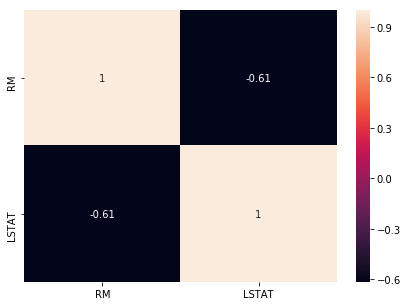

In [234]:
import seaborn as sns
#Next step, we should choose numerical data first
plt.figure(figsize=(7,5))
sns.heatmap(X[['RM','LSTAT']].corr(),annot=True)

#correlation matrix
import scipy
mc = scipy.corrcoef(X[['RM','LSTAT']],rowvar=0)
vif = np.linalg.inv(mc)
print('VIF Value')
print(X.columns[1],vif[0,0])
print(X.columns[2],vif[1,1])

## Outlier Analysis

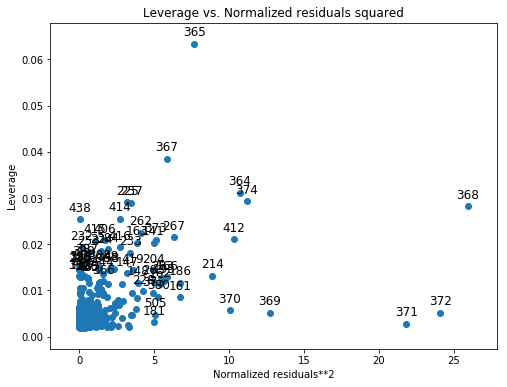

In [235]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.plot_leverage_resid2(model, ax=ax)

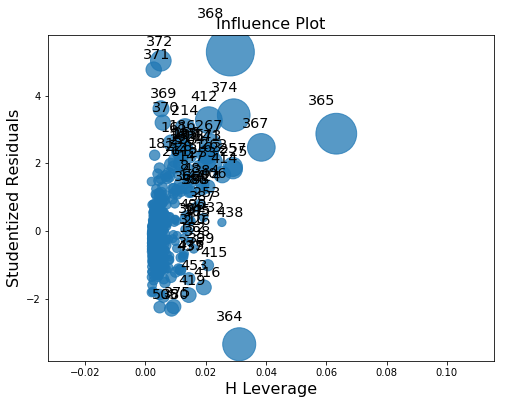

In [236]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.influence_plot(model, ax=ax)

## Model Interpretation 

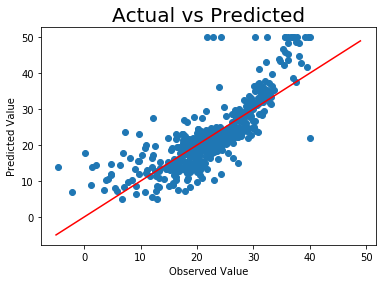

R-Square 0.6385616062603403
R-Square Adj 0.637124475470123


In [237]:
plt.scatter(model.predict(X),y)
plt.plot(np.arange(-5,50),np.arange(-5,50),'r')
plt.xlabel('Observed Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs Predicted', size=20)
plt.show()
print('R-Square',model.rsquared)
print('R-Square Adj', model.rsquared_adj)

In [238]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Thu, 21 Feb 2019   Prob (F-statistic):          7.01e-112
Time:                        02:42:09   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.6